In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from copy import deepcopy
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter
from scipy import ndimage

In [3]:
from biomedical_image_segmentation.elastic_deform import custom_2d_elastic_deform
from biomedical_image_segmentation.utils import insert_grid

In [4]:
PROJECT_PATH = os.getcwd().replace("notebooks","")
DATA_PATH = os.path.join(PROJECT_PATH, "data")
SAMPLES_PATH = os.path.join(DATA_PATH, "samples")
TRAIN_SAMPLES_PATH = os.path.join(SAMPLES_PATH, "train")
TEST_SAMPLES_PATH = os.path.join(SAMPLES_PATH, "test")
LABELS_PATH = os.path.join(DATA_PATH, "masks")
TRAIN_LABELS_PATH = os.path.join(LABELS_PATH, "train")
TEST_LABELS_PATH = os.path.join(LABELS_PATH, "test")

In [5]:
img_name = np.random.choice(os.listdir(TRAIN_SAMPLES_PATH))
img_path = os.path.join(TRAIN_SAMPLES_PATH, img_name)
mask_path = os.path.join(TRAIN_LABELS_PATH, img_name)

In [6]:
img =  cv2.imread(img_path)
mask = cv2.imread(mask_path)
print(f"Image shape: {img.shape}, mask shape: {mask.shape}")

Image shape: (512, 512, 3), mask shape: (512, 512, 3)


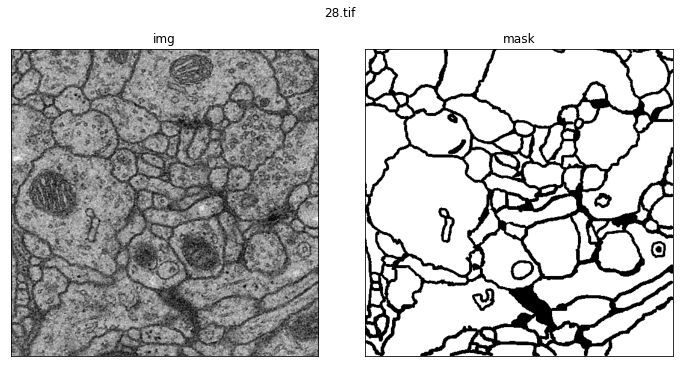

In [7]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.imshow(img, cmap="gray")
ax1.set_title("img")
ax1.get_xaxis().set_ticks([])
ax1.get_yaxis().set_ticks([])

ax2.imshow(mask, cmap="gray")
ax2.set_title("mask")
ax2.get_xaxis().set_ticks([])
ax2.get_yaxis().set_ticks([])
fig.suptitle(t=img_name, x=.5, y=1.)
plt.tight_layout()
plt.show()

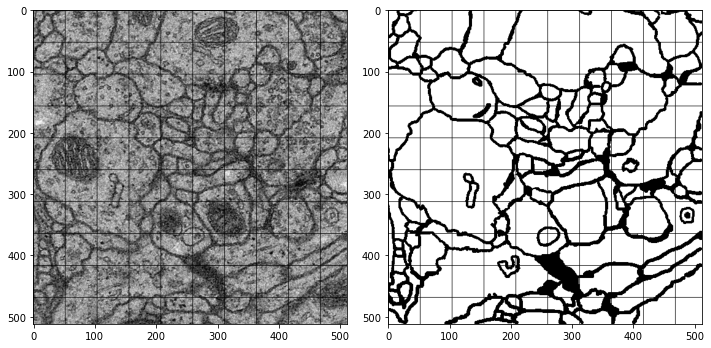

In [8]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5)) 
img = insert_grid(img[:,:,0], 52, 52, color=1, thickness=1)
ax1.imshow(img, cmap="gray")
mask = insert_grid(mask[:,:,0], 52, 52, color=1, thickness=1)
ax2.imshow(mask, cmap="gray")
plt.tight_layout()
plt.show()

## Rotational deformation

Rotating images by quarter degrees

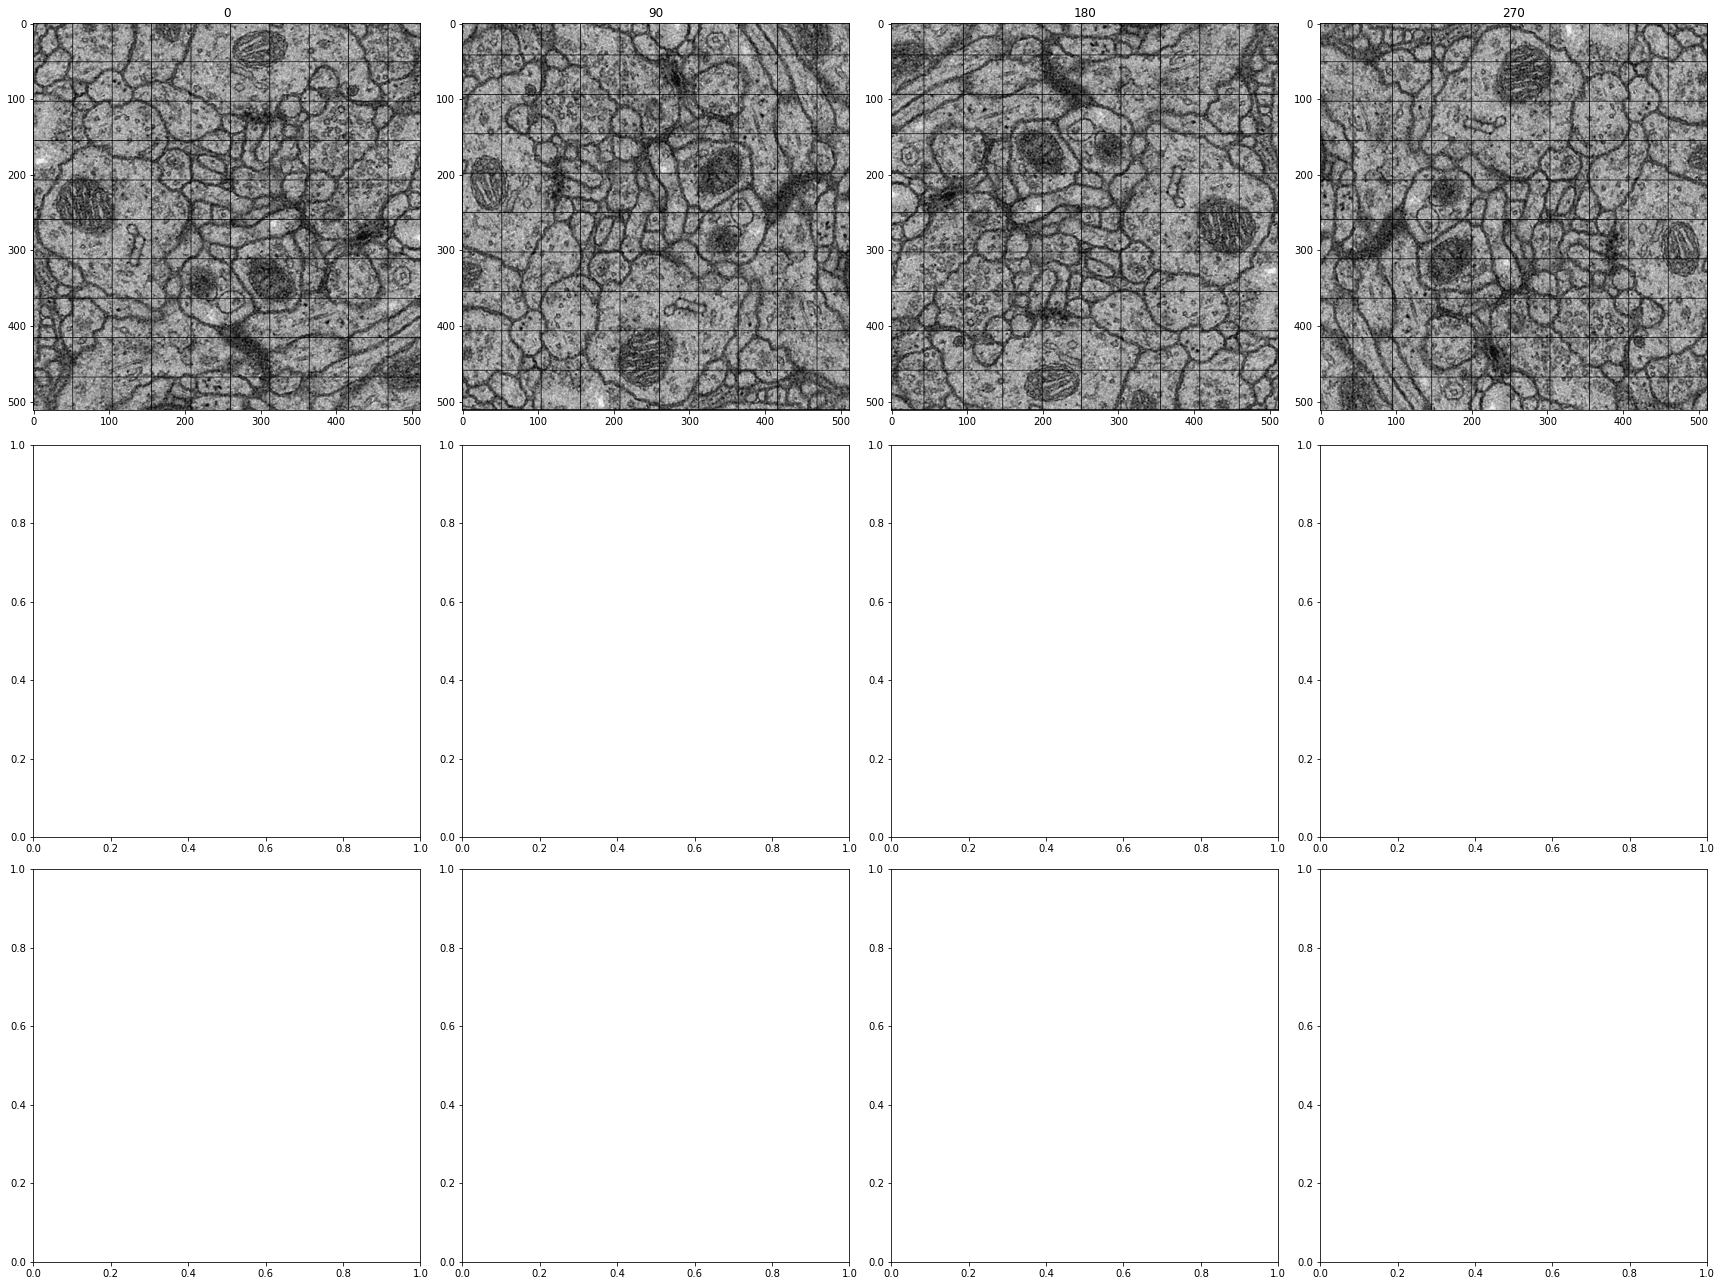

In [21]:
degrees = [0, 90, 180, 270]
fig, axes = plt.subplots(nrows=3, ncols=len(degrees), figsize=(6*len(degrees),6*3))

for i, degree in enumerate(degrees):
    axes[0,i].set_title(degree)
    axes[0,i].imshow(ndimage.rotate(img, angle=degree, mode="reflect"), cmap="gray")

plt.tight_layout()
plt.show()

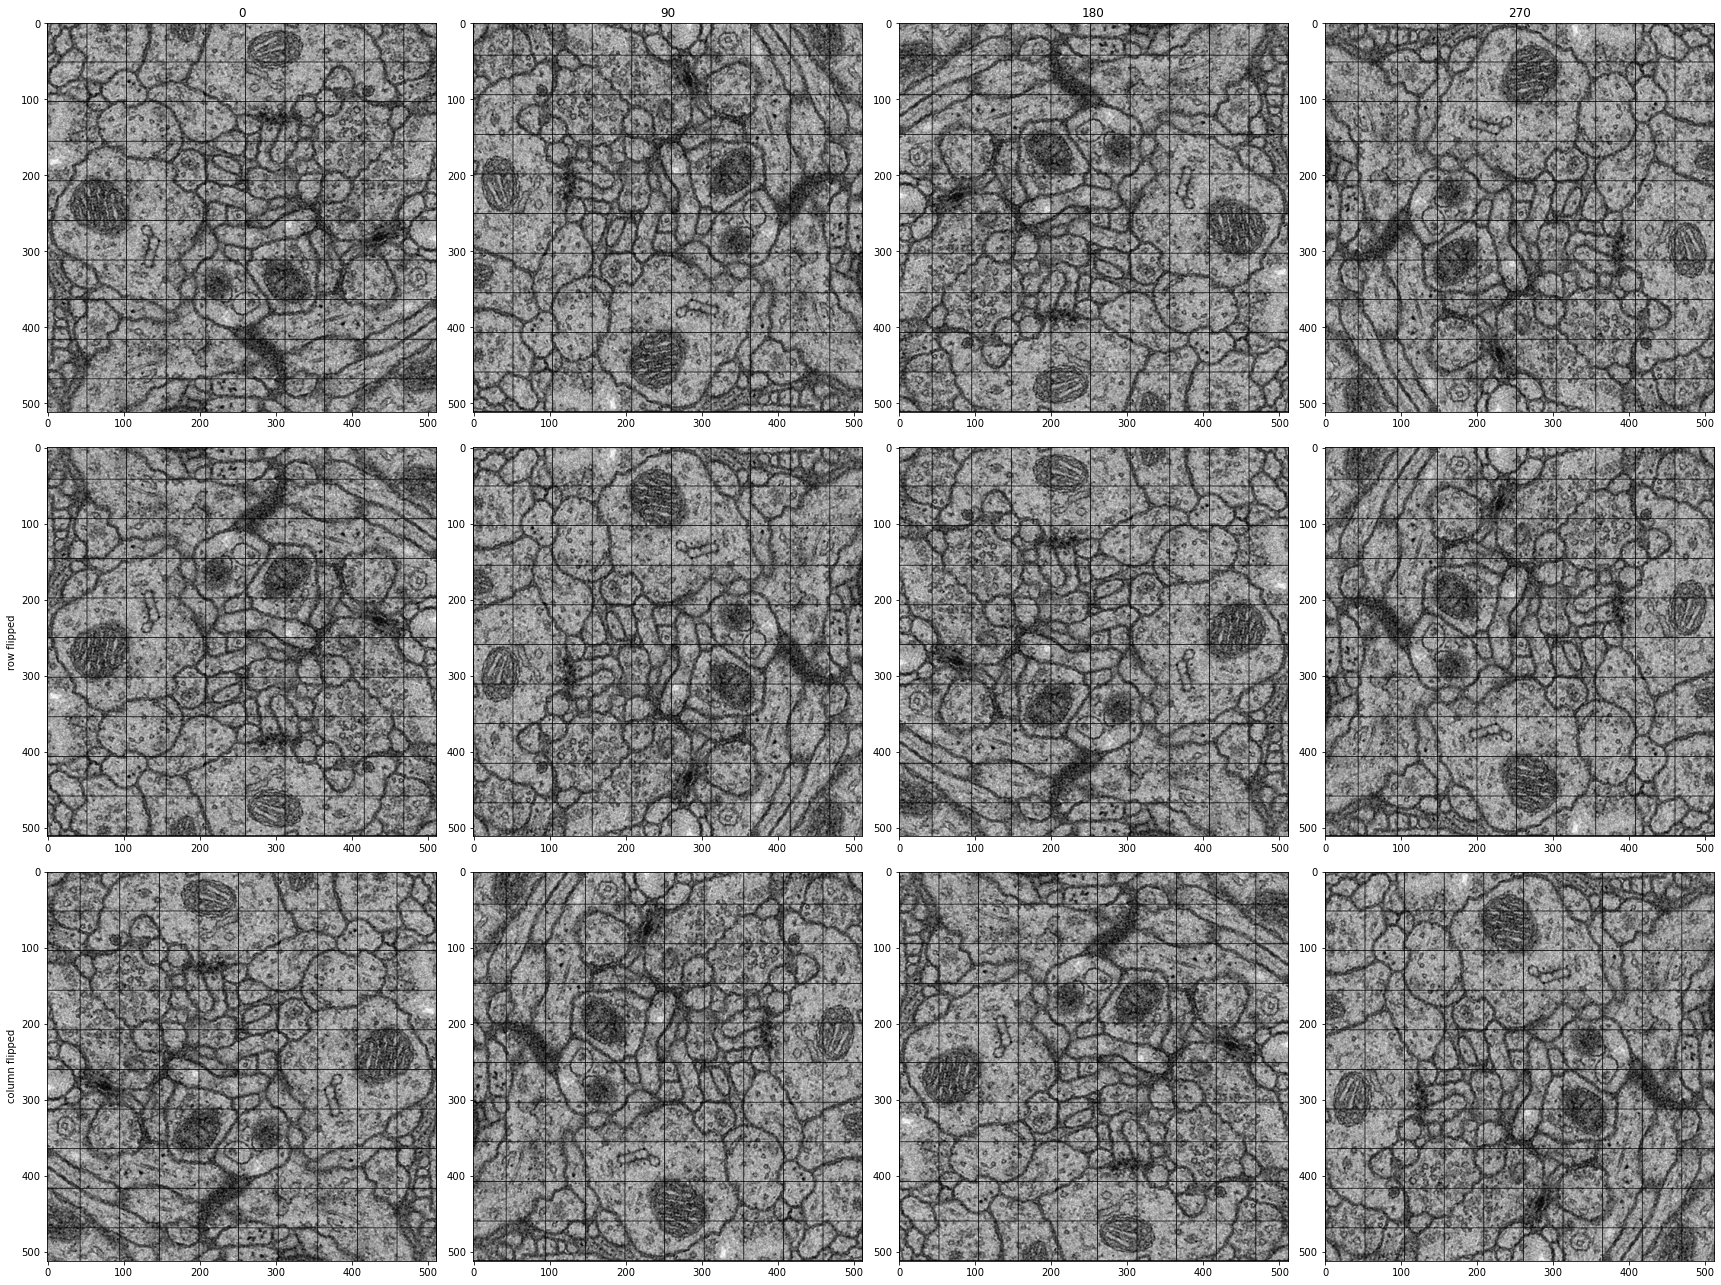

In [19]:
degrees = [0, 90, 180, 270]
fig, axes = plt.subplots(nrows=3, ncols=len(degrees), figsize=(6*len(degrees),6*3))

for i, degree in enumerate(degrees):
    axes[0,i].set_title(degree)
    
    rot_img = ndimage.rotate(img, angle=degree, mode="reflect")
    axes[0,i].imshow(rot_img, cmap="gray")
    
    flip_rot_img1 = np.flip(rot_img, 0)
    axes[1,0].set_ylabel("row flipped")
    axes[1,i].imshow(flip_rot_img1, cmap="gray")
    
    flip_rot_img2 = np.flip(rot_img, 1)
    axes[2,0].set_ylabel("column flipped")
    axes[2,i].imshow(flip_rot_img2, cmap="gray")
    
plt.tight_layout()
plt.show()

In [11]:
a = np.arange(0, 16).reshape(4,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [12]:
np.flip(a, axis=0)

array([[12, 13, 14, 15],
       [ 8,  9, 10, 11],
       [ 4,  5,  6,  7],
       [ 0,  1,  2,  3]])

In [13]:
np.flip(a, axis=1)

array([[ 3,  2,  1,  0],
       [ 7,  6,  5,  4],
       [11, 10,  9,  8],
       [15, 14, 13, 12]])

In [14]:
# a = np.random.choice((0, 255), size=(512,512))

a = deepcopy(img)
degrees = [0, 90, 180, 270]
A = []
for i, degree in enumerate(degrees):
    rot_a = ndimage.rotate(a, angle=degree, mode="reflect")
    A.append(rot_a)
    
    flip_rot_a1 = np.flip(rot_a, axis=0)
    A.append(flip_rot_a1)
    
    flip_rot_a1 = np.flip(flip_rot_a1, axis=1)
    A.append(flip_rot_a1)
    
    
    flip_rot_a2 = np.flip(rot_a, axis=1)
    A.append(flip_rot_a2)
    
    flip_rot_a2 = np.flip(flip_rot_a2, axis=0)
    A.append(flip_rot_a2)

In [15]:
len(A), len(np.unique(A, axis=0))

(20, 8)

In [ ]:
There